In [1]:
# 导库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1.使用matplotlib绘图

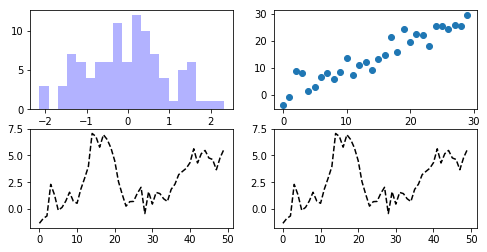

In [27]:
# 单个添加子图
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
_ = ax1.hist(np.random.randn(100),bins = 20, color = 'b', alpha = 0.3)
ax2.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))
# 效果相同的参数省略写法
data = np.random.randn(50).cumsum()
ax3.plot(data, 'k--')
plt.plot(data,linestyle = '--', color= 'k')
# 可以使用'plt.plot?'命令查看文档字符串

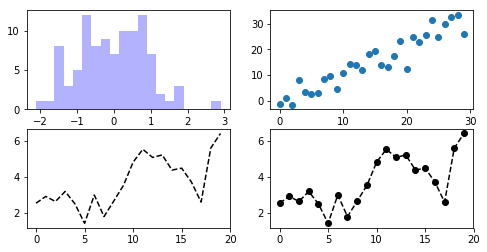

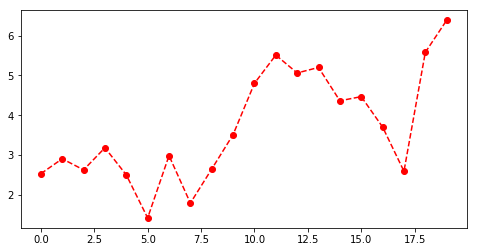

In [41]:
# 用数组方式添加子图
fig, axes = plt.subplots(2,2, figsize = (8,4))
axes[0,0].hist(np.random.randn(100),bins = 20, color = 'b', alpha = 0.3)
axes[0,1].scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))
data = np.random.randn(20).cumsum()
axes[1,0].plot(data, 'k--')
# 在折线上添加标记点
axes[1,1].plot(data, 'ko--')
# 单独大图显示
fig = plt.figure(figsize=(8,4))
plt.plot(data, color='r',linestyle='dashed',marker='o') # 参数显式表示

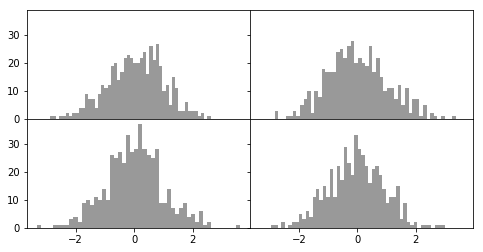

In [262]:
# 共用坐标轴，图间距设置
fig, axes = plt.subplots(2,2, sharex=True, sharey=True, figsize=(8,4))
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500),bins = 50, color = 'k', alpha = 0.4)
plt.subplots_adjust(wspace=0, hspace=0)

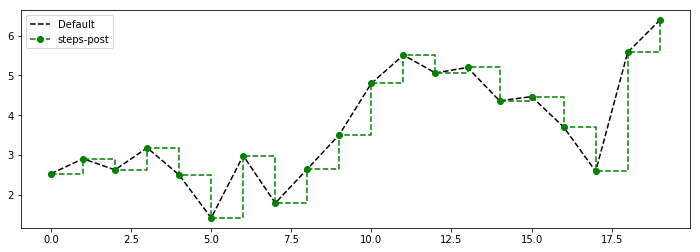

In [53]:
# 添加图例（legend）
fig = plt.figure(figsize=(12,4))
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'go--', drawstyle='steps-post', label='steps-post') #drawstyle默认为线性插入
plt.legend() # 添加该行才会显示label参数内容

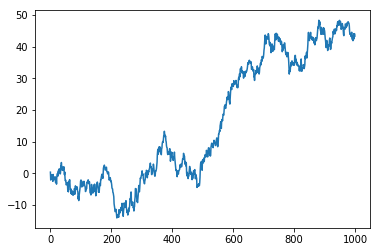

In [73]:
# 设置标题、轴标签、刻度、刻度标签

# 原始视图
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
data = data = np.random.randn(1000).cumsum()
ax.plot(data)

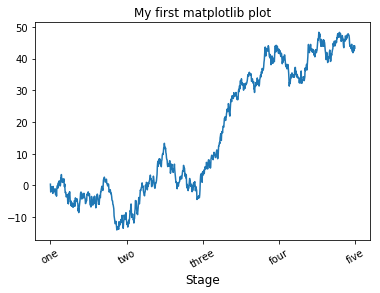

In [82]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
# 设定标签刻度
ax.set_xticks([0,250,500,750,1000])
# 为标签赋值
ax.set_xticklabels(['one','two','three','four','five'], rotation=30, fontsize='medium')
# 设置图标标题
ax.set_title('My first matplotlib plot')
# 设置x轴标题
ax.set_xlabel('Stage', fontsize = 'large')
ax.plot(data)

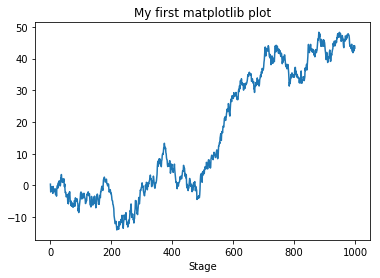

In [88]:
# 批量设置子图参数
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
props = {'title': 'My first matplotlib plot',
         'xlabel': 'Stage'}
ax.set(**props)
ax.plot(data)

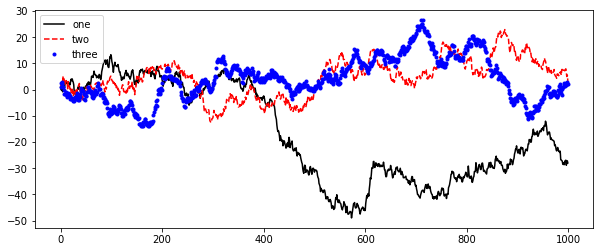

In [97]:
# 多条曲线位于一个图中
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum(),'k',label='one')
ax.plot(np.random.randn(1000).cumsum(),'r--',label='two')
ax.plot(np.random.randn(1000).cumsum(),'b.',label='three')
ax.legend(loc='best')

Text(0.5, 1.0, "10244844's arranged_cnt")

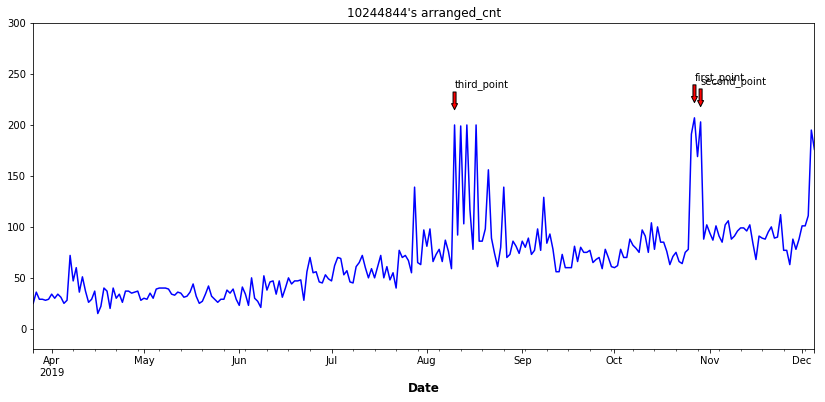

In [284]:
# 在图中添加注释
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,1,1)

df_train_raw = pd.read_csv('/Users/mtdp/MyProjects/sales-forecast/test-files/forecast_sales_sku_c65_qpl_col17_train_promo_5.csv',
                     parse_dates=['dt'], index_col='dt', low_memory=False)
sku_id = 10244844
arr = df_train_raw[df_train_raw.sku_id == sku_id]['arranged_cnt']
arr.plot(ax=ax, style='b-')

# 标记出最大的三个值
crisis_data = [
    (arr.sort_values(ascending=False)[:3].index[0], 'first_point'),
    (arr.sort_values(ascending=False)[:3].index[1], 'second_point'),
    (arr.sort_values(ascending=False)[:3].index[2], 'third_point'),
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, arr.asof(date)+15), 
               xytext=(date, arr.asof(date)+45),
               arrowprops=dict(facecolor='red', headwidth=6, width=3, headlength=6),
               horizontalalignment='left',verticalalignment='top')

# 设定要显示的坐标轴范围
ax.set_xlim([arr.index[0], arr.index[-1]])
ax.set_xlabel('Date', fontsize ='large', weight='bold')
ax.set_ylim([-20, 300])
ax.set_title('{}\'s arranged_cnt'.format(sku_id))
# 保存图片到本地
#plt.savefig('/Users/mtdp/Desktop/fig.png', dpi=400, bbox_inches='tight')

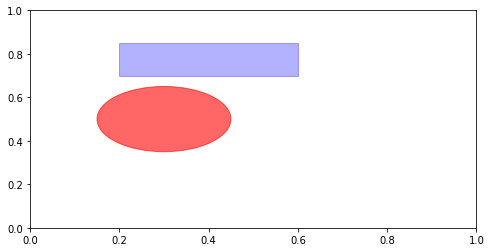

In [252]:
# 绘制图形
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)

rect = plt.Rectangle((0.2, 0.7), 0.4, 0.15, color='b', alpha=0.3)
circ = plt.Circle((0.3,0.5), 0.15, color='r', alpha=0.6)
ax.add_patch(rect)
ax.add_patch(circ)

### 2.使用pandas和seaborn绘图

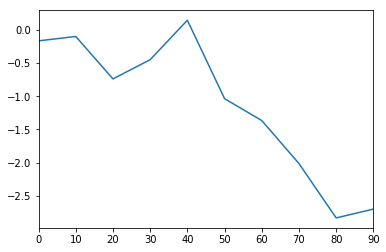

In [300]:
# Series的plot
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0,100,10))
s.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1540e13c8>,
      dtype=object)

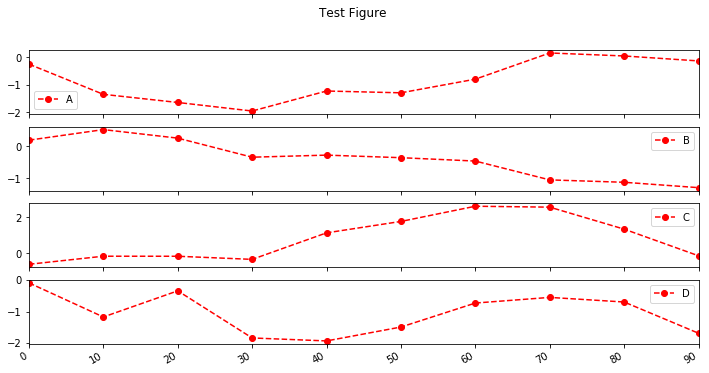

In [344]:
# DataFrame的plot
df = pd.DataFrame(np.random.randn(10,4).cumsum(0),
                 columns=['A', 'B', 'C', 'D'],
                 index=np.arange(0,100,10))
df.plot(style='ro--', figsize=(12,6), subplots=True, title='Test Figure')

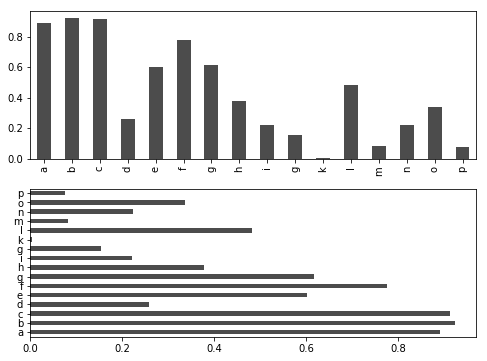

In [361]:
# Series纵向和横行柱状图
fig, axes = plt.subplots(2,1, figsize=(8, 6))
data = pd.Series(np.random.rand(16), index=list('abcdefghigklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

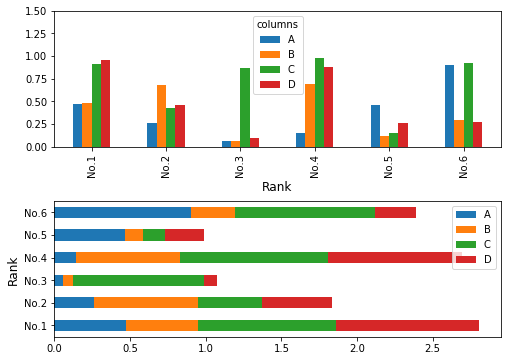

In [415]:
# DataFrame柱状图
fig, axes = plt.subplots(2,1, figsize=(8,6))
axes[0].set_xlabel('Rank', fontsize ='large')
axes[1].set_ylabel('Rank', fontsize ='large')
axes[0].set_ylim(0, 1.5)
df = pd.DataFrame(np.random.rand(6,4),
                 columns=(pd.Index(['A', 'B', 'C', 'D'],name='columns')),
                 index=['No.1','No.2','No.3','No.4','No.5','No.6'])
df.plot.bar(ax=axes[0])
df.plot.barh(ax=axes[1], stacked=True)
plt.subplots_adjust(wspace=0, hspace=0.4)
plt.legend(loc='best')

In [449]:
# 导入数据集
df = pd.read_csv('/Users/mtdp/MyProjects/sales-forecast/test-files/forecast_sales_sku_c65_qpl_col17_train_promo_5.csv',
                     parse_dates=['dt'], low_memory=False)
wea_counts = pd.crosstab(df['day_abbr'], df['weather'])  # 形成交叉表

# 统计星期日期每个天气出现的次数
wea_counts

weather,大雨,小雨,晴,雨,雾,霾
day_abbr,,,,,,
Fri,0,0,61693,1927,9397,0
Mon,0,2028,57632,5455,9168,0
Sat,1898,0,64959,1912,4080,0
Sun,2063,2182,55135,7525,8209,0
Thu,0,1997,67492,1789,5395,0
Tue,1759,2037,57116,3823,7501,2239
Wed,0,0,59348,3940,9123,2279


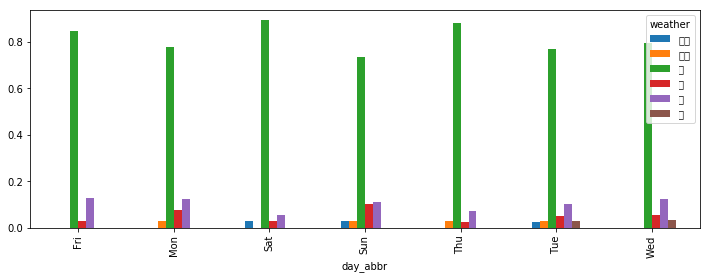

In [444]:
# 实际数据绘图
wea_counts = wea_counts.div(wea_counts.sum(1), axis=0)
wea_counts.plot.bar(figsize=(12,4))

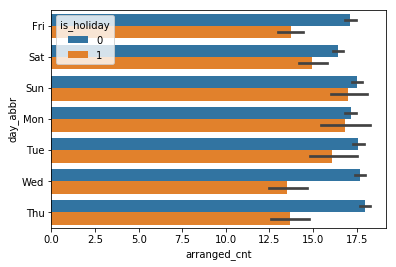

In [531]:
# 按星期几统计销售额
sns.barplot(x='arranged_cnt', y='day_abbr', hue='is_holiday', data=df, orient='h')

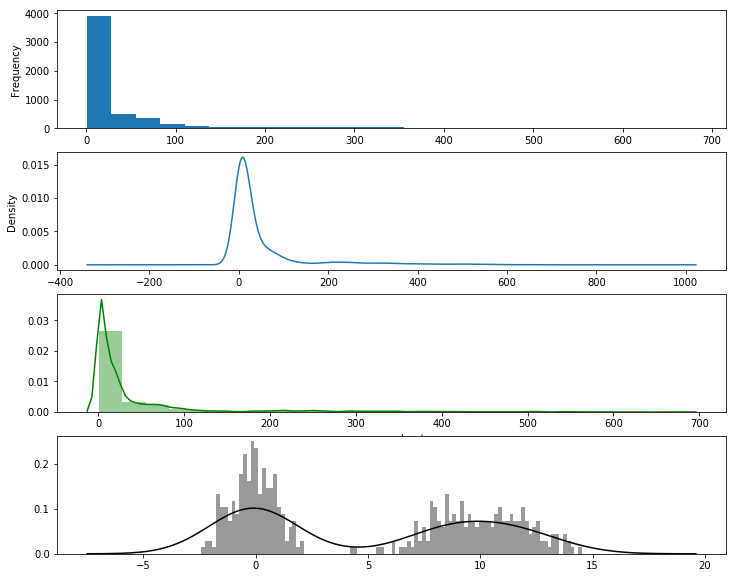

In [488]:
# DataFrame绘制直方图
fig, axes = plt.subplots(4,1,figsize=(12,10))
xd = df[df.cat1_name == '鲜蛋及蛋制品']['arranged_cnt']
xd.plot.hist(ax=axes[0], bins=25)
# DataFrame绘制密度图
xd.plot.density(ax=axes[1])
# sns绘制直方和密度图
sns.distplot(xd, bins=25, color='g', ax=axes[2])  # 实际数据
# 构造数据
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k', ax=axes[3])

Text(0.5, 1.0, 'arranged_cnt of sku_id: 10026534 vs csu_origin_price')

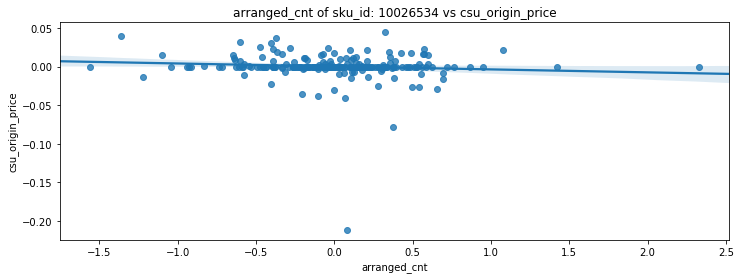

In [527]:
# 绘制散点图
data = df[df.sku_id == 10026534][['csu_origin_price','cost_7d','cost_30d','arranged_cnt']]
trans_data = np.log(data).diff().dropna()
figure = plt.figure(figsize=(12,4))
sns.regplot('arranged_cnt','csu_origin_price', data=trans_data)
plt.title('%s of sku_id: 10026534 vs %s' % ('arranged_cnt', 'csu_origin_price'))

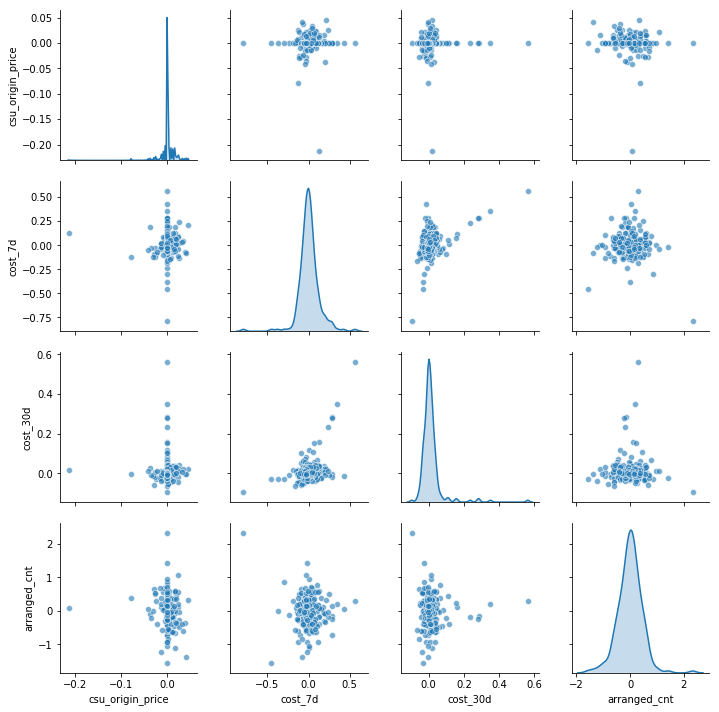

In [541]:
# 绘制散点图矩阵
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha':0.6})

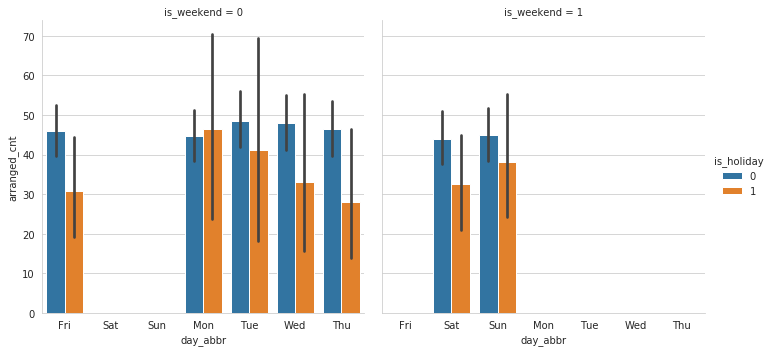

In [546]:
# 分面网格
sns.set_style("whitegrid") # 添加该行增加网格线
sns.factorplot(x='day_abbr', y='arranged_cnt', hue='is_holiday', col='is_weekend',
              kind='bar', data=df[df.cat1_name == '鲜蛋及蛋制品'])

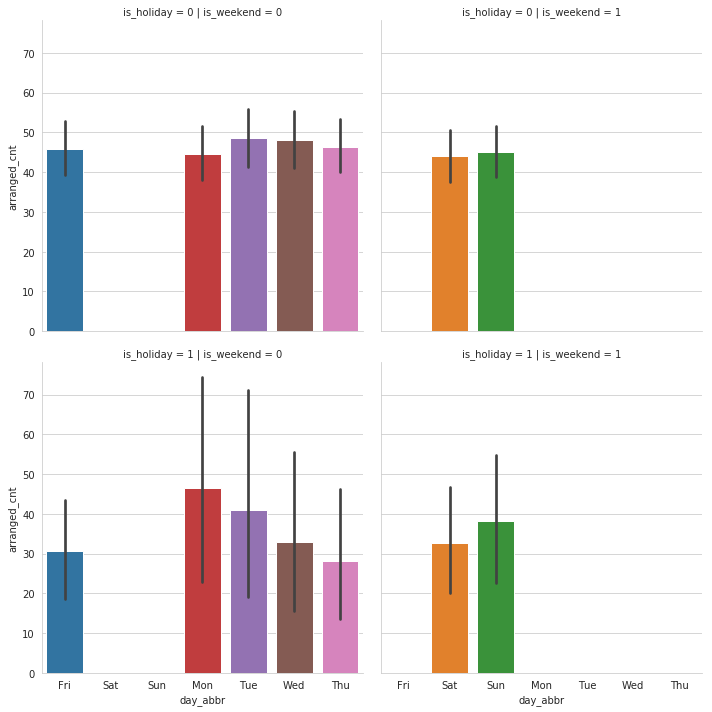

In [549]:
# 拓展分面网格
sns.factorplot(x='day_abbr', y='arranged_cnt', row='is_holiday', col='is_weekend',
              kind='bar', data=df[df.cat1_name == '鲜蛋及蛋制品'])

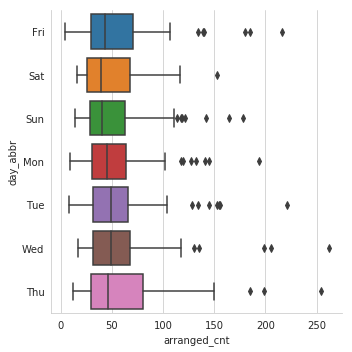

In [562]:
# 绘制箱形图
sns.factorplot(x='arranged_cnt', y='day_abbr', kind='box', data=df[df.sku_id == 10026534])